In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# loading data
data = load_breast_cancer()

In [6]:
# data variables - features
X = data.data
# data traget variables
y = data.target  

In [7]:
# train test split 70:30
x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test) 

In [9]:
N, D = x_train.shape 

In [10]:
# # buliding model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(D, )),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Alternative way:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation ='sigmoid'))

2022-04-10 15:31:48.765725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 15:31:48.813204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 15:31:48.813727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 15:31:48.814971: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics=['accuracy'])

In [14]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs= 100)

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.8032 - accuracy: 0.5101 - val_loss: 0.7338 - val_accuracy: 0.5205
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7225 - accuracy: 0.5879 - val_loss: 0.6587 - val_accuracy: 0.5965
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.6583 - val_loss: 0.5933 - val_accuracy: 0.6725
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5992 - accuracy: 0.6960 - val_loss: 0.5405 - val_accuracy: 0.7661
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.7613 - val_loss: 0.4970 - val_accuracy: 0.8187
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5117 - accuracy: 0.7864 - val_loss: 0.4601 - val_accuracy: 0.8421
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8216 - val_loss: 0.4279 - val_accuracy: 0.8713
Epoch 8/100


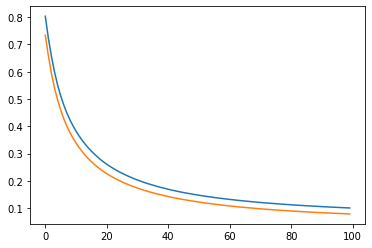

In [20]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label ='val_loss')